<a href="https://colab.research.google.com/github/Vishal-257/EDA_DA/blob/main/eda_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np

In [63]:
df = pd.read_csv('/content/happiness.csv')

In [64]:
df.head(n=10)

,rownames,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
0,1,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,...,1.0,0.0,1,0,0,0,0,0,0,1.0
1,2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
2,3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
3,4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1.0
4,5,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
5,6,1994,working parttime,43.0,NaN,NaN,15.0,middle atlantic,0.0,0.0,...,1.0,0.0,1,0,0,0,0,0,0,NaN
6,7,1994,working fulltime,20.0,no,NaN,9.0,middle atlantic,0.0,1.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
7,8,1994,working fulltime,44.0,NaN,NaN,12.0,foreign,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,0.0
8,9,1994,working fulltime,42.0,no,NaN,12.0,foreign,2.0,1.0,...,1.0,0.0,1,0,0,0,0,0,0,NaN
9,10,1994,working fulltime,46.0,NaN,iap,12.0,middle atlantic,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,1.0


In [65]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 17137, Columns: 34


In [66]:
print(df.info())
print(df.describe())
categorical_columns = df.select_dtypes(include=['object']).columns
print(df[categorical_columns].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     17137 non-null  int64  
 1   year         17137 non-null  int64  
 2   workstat     17134 non-null  object 
 3   prestige     16283 non-null  float64
 4   divorce      9754 non-null   object 
 5   widowed      11096 non-null  object 
 6   educ         17093 non-null  float64
 7   reg16        17137 non-null  object 
 8   babies       17036 non-null  float64
 9   preteen      17036 non-null  float64
 10  teens        17049 non-null  float64
 11  income       15045 non-null  object 
 12  region       17137 non-null  object 
 13  attend       16864 non-null  object 
 14  happy        17137 non-null  object 
 15  owngun       11297 non-null  object 
 16  tvhours      11794 non-null  float64
 17  vhappy       17137 non-null  int64  
 18  mothfath16   17132 non-null  float64
 19  blac

In [67]:
print(df.isnull().sum())

rownames           0
year               0
workstat           3
prestige         854
divorce         7383
widowed         6041
educ              44
reg16              0
babies           101
preteen          101
teens             88
income          2092
region             0
attend           273
happy              0
owngun          5840
tvhours         5343
vhappy             0
mothfath16         5
black              0
gwbush04       15207
female             0
blackfemale        0
gwbush00       13701
occattend        273
regattend        273
y94                0
y96                0
y98                0
y00                0
y02                0
y04                0
y06                0
unem10          5796
dtype: int64


In [68]:
df = df.drop(['gwbush00','unem10','gwbush04'],axis = 1)

In [69]:
print(df.shape)

(17137, 31)


In [70]:
columns = df.columns

In [71]:
print("Mean of:")
for col in columns:
  if(df[col].dtype==int or df[col].dtype==float):
    df[col] = df[col].fillna(df[col].mode()[0])
    x = df[col].mean()
    print(col,":",x)

Mean of:
rownames : 8569.0
year : 1999.4741203244441
prestige : 43.87754099367439
educ : 13.319077985140115
babies : 0.2070908664005635
preteen : 0.2557525240666823
teens : 0.18135961053434219
tvhours : 2.9040189927081568
vhappy : 0.3069382038863278
mothfath16 : 0.6929722157366331
black : 0.13841395810235163
female : 0.559082686584583
blackfemale : 0.08904709108945556
occattend : 0.28498576850094876
regattend : 0.1312262808349146
y94 : 0.17371768687634942
y96 : 0.16834918597187373
y98 : 0.16373927758650872
y00 : 0.16204703273618487
y02 : 0.07988562758942638
y04 : 0.07801832292700006
y06 : 0.1742428663126568


In [72]:
print("Standard deviation of:")
for col in columns:
  if(df[col].dtype==int or df[col].dtype==float):
    x = df[col].std()
    print(col,":",x)

Standard deviation of:
rownames : 4947.170117013025
year : 4.143357578023848
prestige : 13.873965071808128
educ : 2.986784887039283
babies : 0.5405420440627029
preteen : 0.6215334744450766
teens : 0.4936977335865132
tvhours : 2.3274571287454373
vhappy : 0.4612369856486698
mothfath16 : 0.46127447755593226
black : 0.34534402218853383
female : 0.49651145163592225
blackfemale : 0.2848200140749841
occattend : 0.45142104961848034
regattend : 0.3376576739370208
y94 : 0.3788775905902757
y96 : 0.3741869959534851
y98 : 0.3700496146022133
y00 : 0.36850470287598425
y02 : 0.27112396341556144
y04 : 0.2682082435269197
y06 : 0.37932925848656257


In [73]:
print("Variance of:")
for col in columns:
  if(df[col].dtype==int or df[col].dtype==float):
    x = df[col].var()
    print(col,":",x)

Variance of:
rownames : 24474492.166666668
year : 17.16741201936765
prestige : 192.4869068137519
educ : 8.920883961446263
babies : 0.292185701399485
preteen : 0.3863038598557686
teens : 0.24373745214845974
tvhours : 5.417056686147956
vhappy : 0.21273955693027122
mothfath16 : 0.21277414364449826
black : 0.11926249366135454
female : 0.24652362160561078
blackfemale : 0.08112244041767414
occattend : 0.2037809640386505
regattend : 0.11401270476855943
y94 : 0.14354822865149255
y96 : 0.14001590794069346
y98 : 0.1369367172672466
y00 : 0.13579571604171745
y02 : 0.0735082035381627
y04 : 0.07193566189579546
y06 : 0.1438906863439654


In [74]:
corr_df = df
columns = df.columns
for col in columns:
  if(df[col].dtype!=int and df[col].dtype!=float):
    corr_df.drop(columns=col, inplace=True)

In [75]:
correlation_matrix = corr_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             rownames      year  prestige      educ    babies   preteen  \
rownames     1.000000  0.980642  0.021869  0.008828 -0.029565 -0.028055   
year         0.980642  1.000000  0.033615  0.027434 -0.026444 -0.029795   
prestige     0.021869  0.033615  1.000000  0.522811 -0.014909 -0.007824   
educ         0.008828  0.027434  0.522811  1.000000 -0.004396 -0.006918   
babies      -0.029565 -0.026444 -0.014909 -0.004396  1.000000  0.180785   
preteen     -0.028055 -0.029795 -0.007824 -0.006918  0.180785  1.000000   
teens       -0.000532  0.000588 -0.017775 -0.021106 -0.035141  0.180785   
tvhours      0.010922  0.009227 -0.199099 -0.244835 -0.018008 -0.051414   
vhappy       0.016312  0.010997  0.095044  0.084643  0.016945  0.008592   
mothfath16  -0.003977 -0.005080  0.106647  0.136651 -0.042799 -0.032696   
black       -0.006054  0.002911 -0.116796 -0.113279  0.041579  0.056435   
female      -0.008418 -0.007873 -0.018259 -0.038523  0.059598  0.053114   
black

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

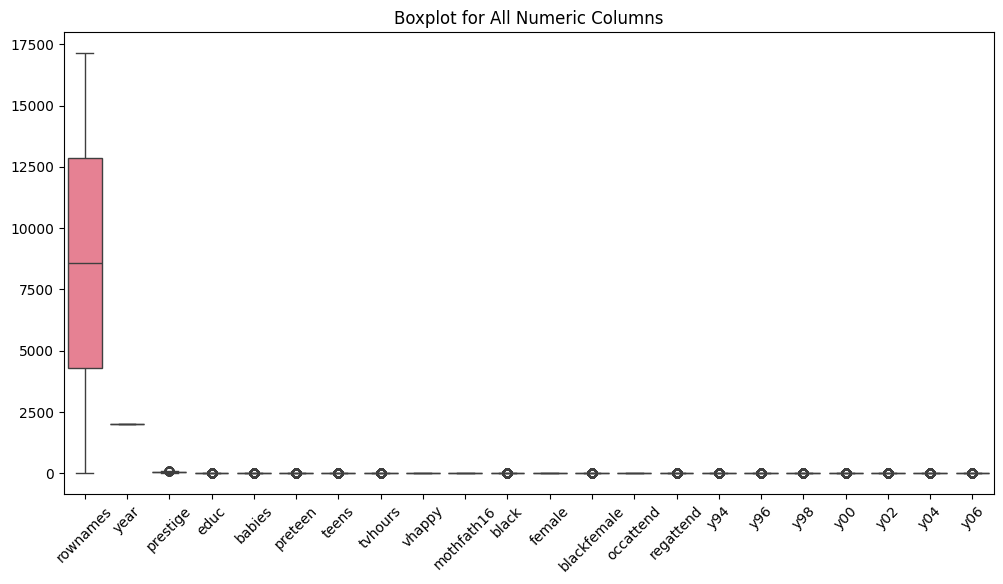

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.show()

In [78]:
for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

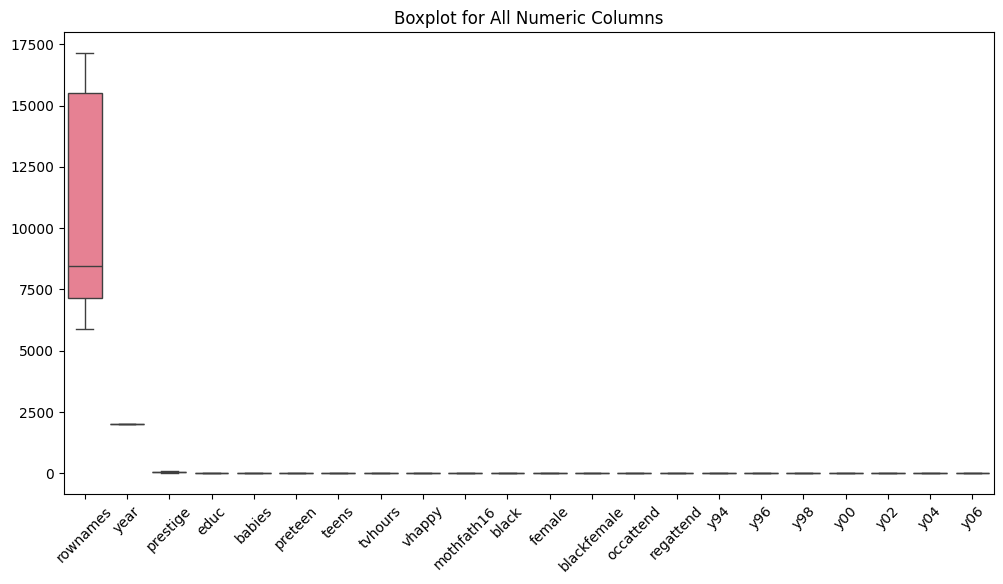

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.show()

In [80]:
from sklearn.cluster import KMeans

In [81]:
kmean = KMeans(n_clusters = 4)